# PARAFAC and PCA for analysis of EEM data from fluoresence spectroscopy

## Import all requirements

In [1]:
from component_vis.data import load_aminoacids
import numpy as np
import tensorly as tl
import tensorly.decomposition
from component_vis.postprocessing import postprocess
import component_vis.visualisation as compvis
import matplotlib.pyplot as plt

## Load the Aminoacids dataset into a labelled xarray

In [2]:
data = load_aminoacids()
data

Loading Aminoacids dataset from "PARAFAC. Tutorial and applications" by Rasmus Bro


<xarray.DataArray (Samples: 5, Excitation frequency: 61, Emission frequency: 201)>
array([[[ 8.5800e-01,  3.2000e-01,  8.6300e-01, ...,  1.4530e+01,
          1.1931e+01,  1.2159e+01],
        [ 1.8680e+00,  1.0100e+00,  1.9040e+00, ...,  1.3352e+01,
          1.3123e+01,  1.1265e+01],
        [ 3.0170e+00,  2.3680e+00,  2.0140e+00, ...,  1.4090e+01,
          1.3342e+01,  1.3222e+01],
        ...,
        [ 6.7000e-02,  3.5000e-02,  1.0200e-01, ...,  6.8130e+00,
          7.0700e+00,  6.2300e+00],
        [ 1.0400e-01,  1.1100e-01,  7.1000e-02, ...,  6.2930e+00,
          5.3250e+00,  5.7000e+00],
        [ 1.1100e-01,  9.2000e-02, -3.7000e-02, ...,  4.5180e+00,
          4.6780e+00,  4.5200e+00]],

       [[ 1.3120e+00,  1.7420e+00,  9.8700e-01, ...,  1.9750e+00,
          2.3760e+00,  1.7160e+00],
        [ 1.6590e+00,  1.7030e+00, -3.1700e-01, ...,  2.2210e+00,
          1.6750e+00,  1.4430e+00],
        [ 3.0140e+00,  2.7740e+00,  2.7270e+00, ...,  2.3900e+00,
          1.8250e+00,  1.9120e+00],
...
        [ 7.7000e-02,  1.0600e-01,  1.0000e-01, ...,  4.5530e+00,
          4.2140e+00,  4.2060e+00],
        [ 3.5000e-02,  5.1000e-02,  7.0000e-02, ...,  4.1280e+00,
          3.6160e+00,  3.3370e+00],
        [ 1.0000e-03,  9.3000e-02, -3.3000e-02, ...,  3.1510e+00,
          3.2040e+00,  2.7280e+00]],

       [[ 3.9630e+00,  1.4250e+00,  1.7640e+00, ...,  5.0110e+00,
          5.5580e+00,  4.7240e+00],
        [ 2.6350e+00,  3.5810e+00,  2.2840e+00, ...,  5.0580e+00,
          5.2240e+00,  4.6420e+00],
        [ 4.0200e+00,  3.9290e+00,  4.5730e+00, ...,  6.2760e+00,
          5.2640e+00,  5.3010e+00],
        ...,
        [ 7.1000e-02,  9.6000e-02,  1.0100e-01, ...,  2.5200e+00,
          2.9110e+00,  2.2010e+00],
        [ 1.0300e-01,  1.1800e-01,  6.8000e-02, ...,  2.3330e+00,
          2.6400e+00,  2.1940e+00],
        [ 3.5000e-02,  1.0100e-01,  2.2000e-02, ...,  1.9010e+00,
          1.7820e+00,  1.9930e+00]]])
Coordinates:
  * Samples               (Samples) int32 0 1 2 3 4
  * Emission frequency    (Emission frequency) float64 250.0 251.0 ... 450.0
  * Excitation frequency  (Excitation frequency) float64 240.0 241.0 ... 300.0

## Perform principal component analysis on the last slice in the dataset

In [3]:
U, s, Vh = np.linalg.svd(data[-1])

# Store as a tensorly CP-tensor
pca = (s[:3], (U[:, :3], Vh.T[:, :3]))

### Postprocess the components by resolving the sign indeterminacy and labelling the components

In [4]:
pca = postprocess(pca, dataset=data[-1])

### Plot the components

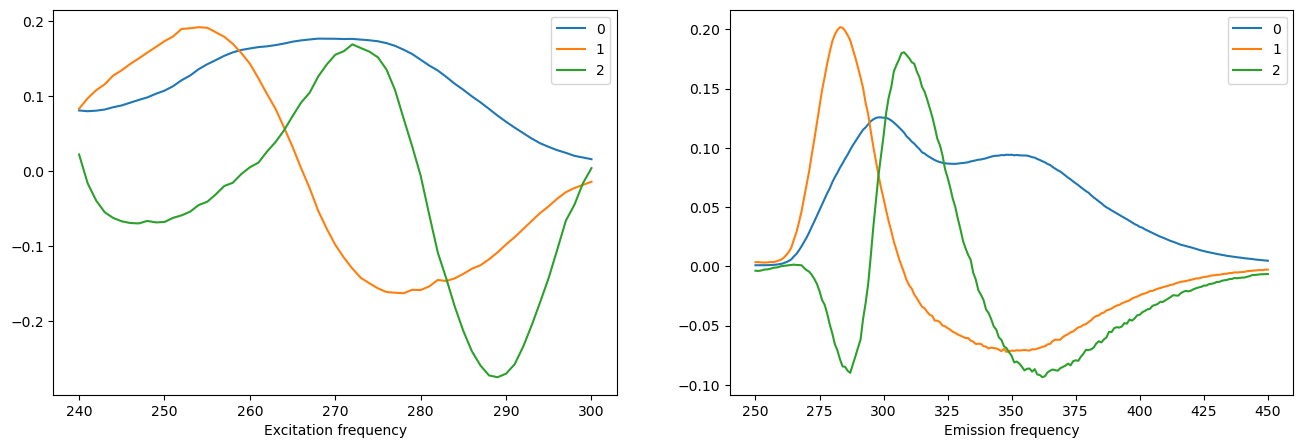

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
pca[1][0].plot(ax=axes[0])
pca[1][1].plot(ax=axes[1])
plt.show()

## Perform PARAFAC analysis of the full dataset

In [6]:
parafac = tl.decomposition.parafac(data.data, 3)
parafac = postprocess(parafac, dataset=data)

### Postprocess the components by resolving the sign indeterminacy and labelling them

In [7]:
parafac = postprocess(parafac, dataset=data)

### Plot the components

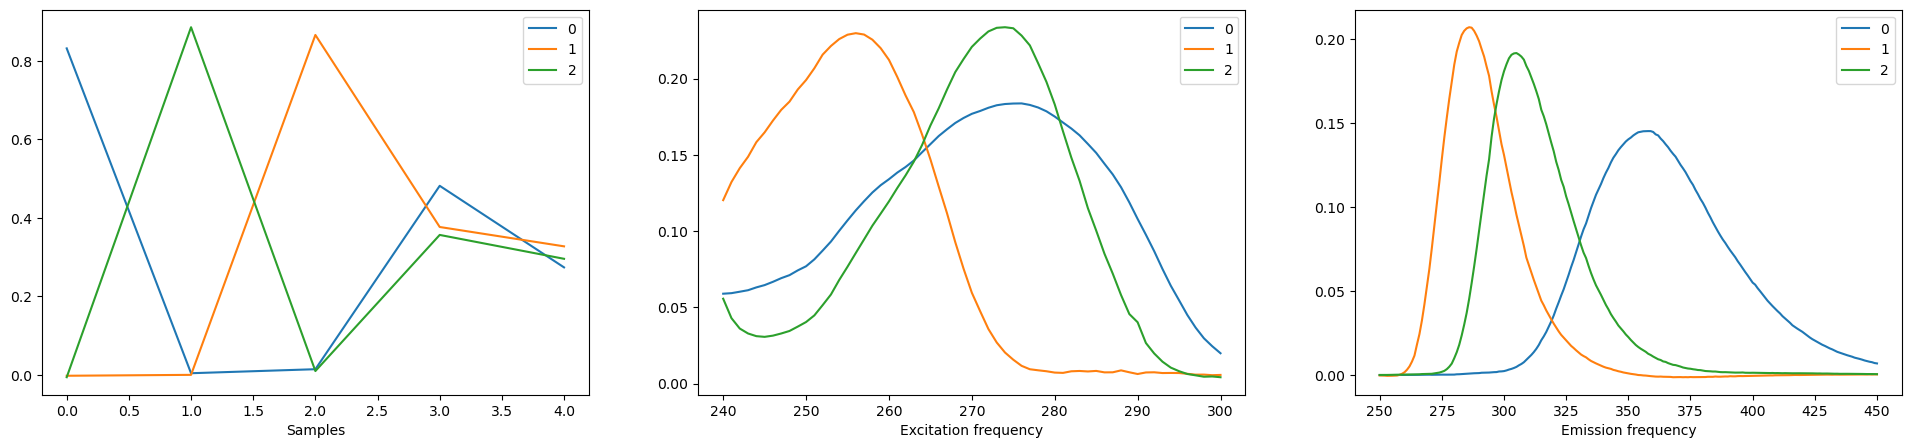

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5))
parafac[1][0].plot(ax=axes[0])
parafac[1][1].plot(ax=axes[1])
parafac[1][2].plot(ax=axes[2])
plt.show()

## Constrained PARAFAC2 can also be beneficial

We know that the components obtained from EEM-data should be non-negative (concentration and emission and excitation spectra). Let us fit a model with only the final three samples both with and without non-negativity constraints.

### Without non-negativity constraints

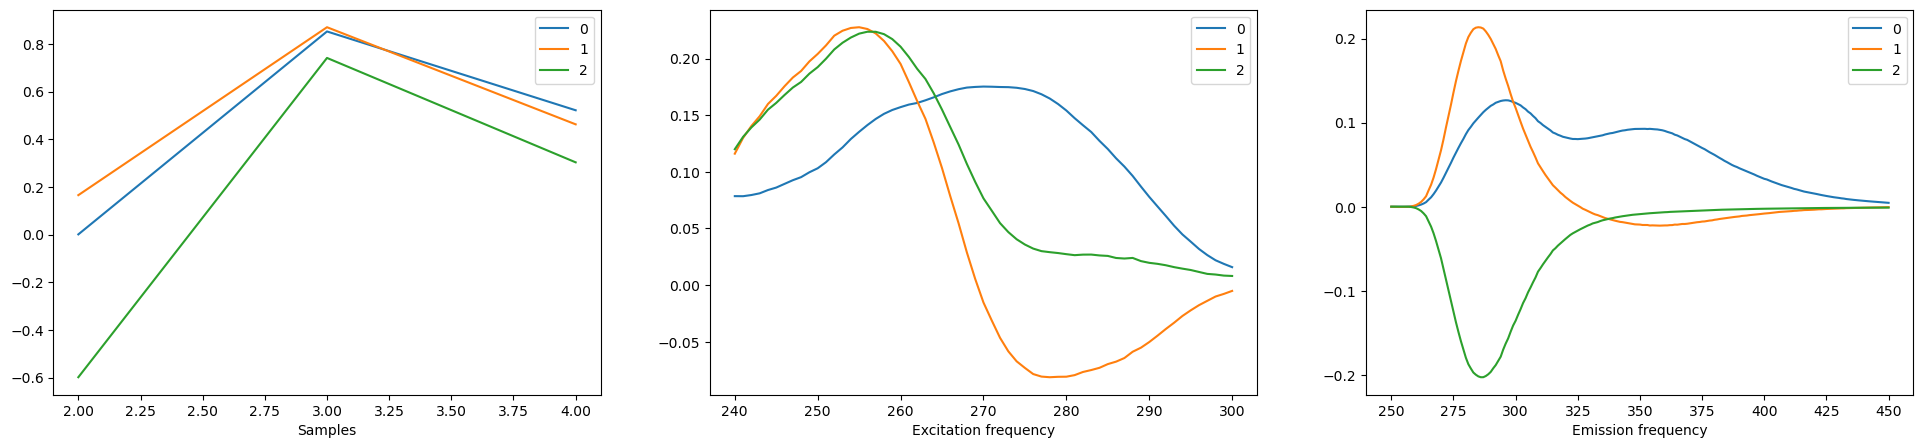

In [9]:
parafac = tl.decomposition.parafac(data[-3:].data, 3)
parafac = postprocess(parafac, dataset=data[-3:])
parafac = postprocess(parafac, dataset=data[-3:])
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

parafac[1][0].plot(ax=axes[0])
parafac[1][1].plot(ax=axes[1])
parafac[1][2].plot(ax=axes[2])
plt.show()

### With non-negativity constraints

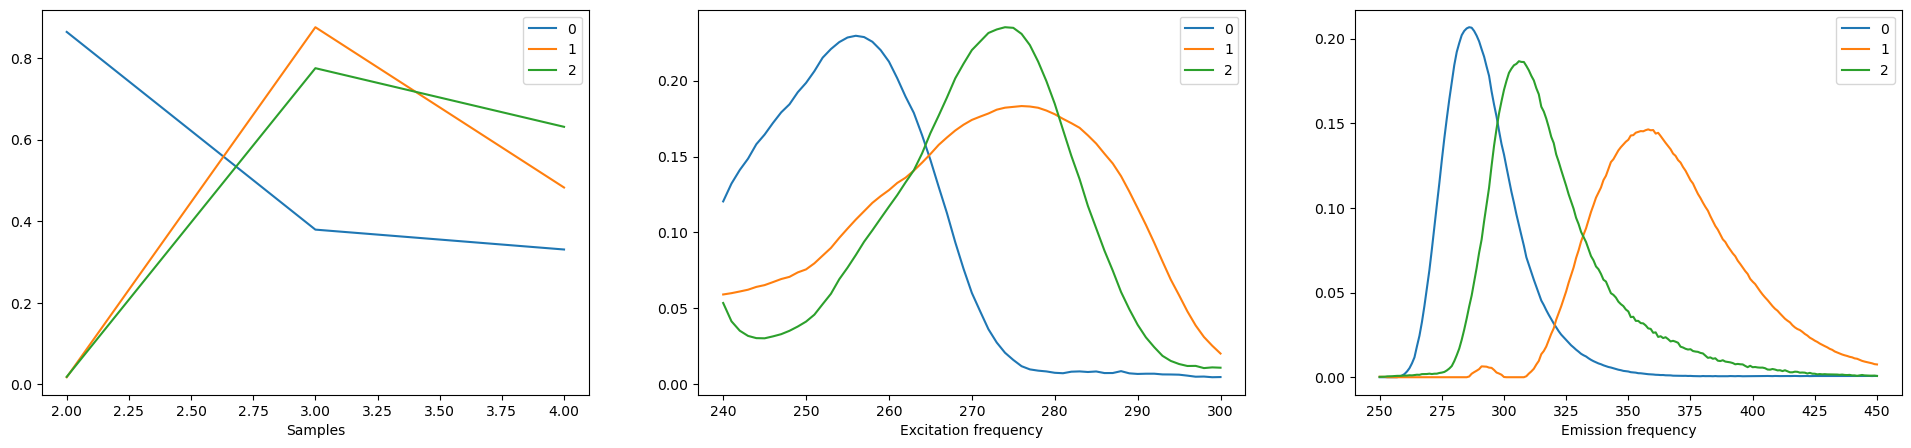

In [10]:
parafac = tl.decomposition.non_negative_parafac_hals(data[-3:].data, 3)
parafac = postprocess(parafac, dataset=data[-3:])
parafac = postprocess(parafac, dataset=data[-3:])
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

parafac[1][0].plot(ax=axes[0])
parafac[1][1].plot(ax=axes[1])
parafac[1][2].plot(ax=axes[2])
plt.show()